# Features

Here, we showcase some key features of CausalDynamics using small example graphs.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch

from causaldynamics.scm import create_scm_graph
from causaldynamics.plot import plot_trajectories, plot_scm, plot_3d_trajectories
from causaldynamics.creator import create_scm, simulate_system


## Basic coupled model

INFO - Creating SCM with 3 nodes and 3 dimensions each...
INFO - Simulating Lorenz system for 1000 timesteps...
/Users/herdeanu/kausable/causaldynamics/src/causaldynamics/plot.py:759: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 1'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 2'}, xlabel='X', ylabel='Y', zlabel='Z'>)

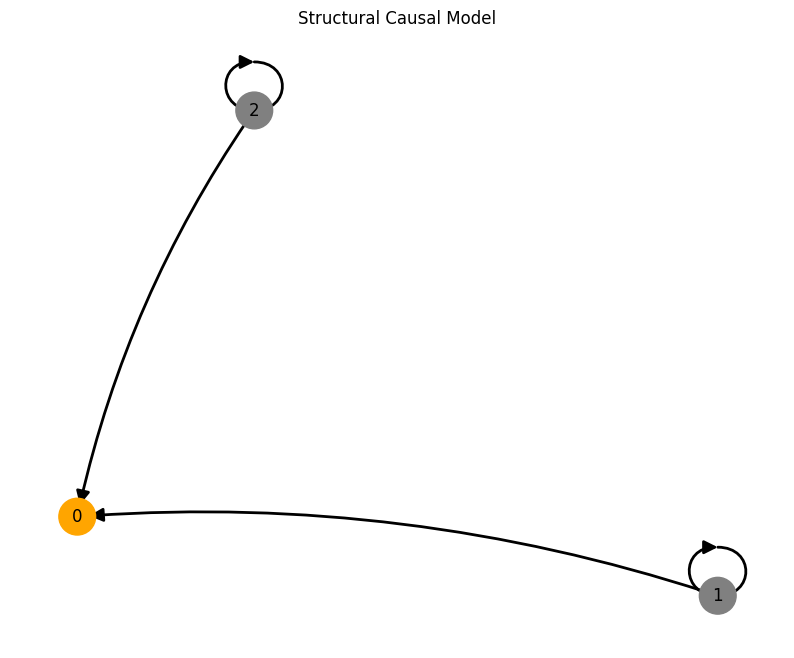

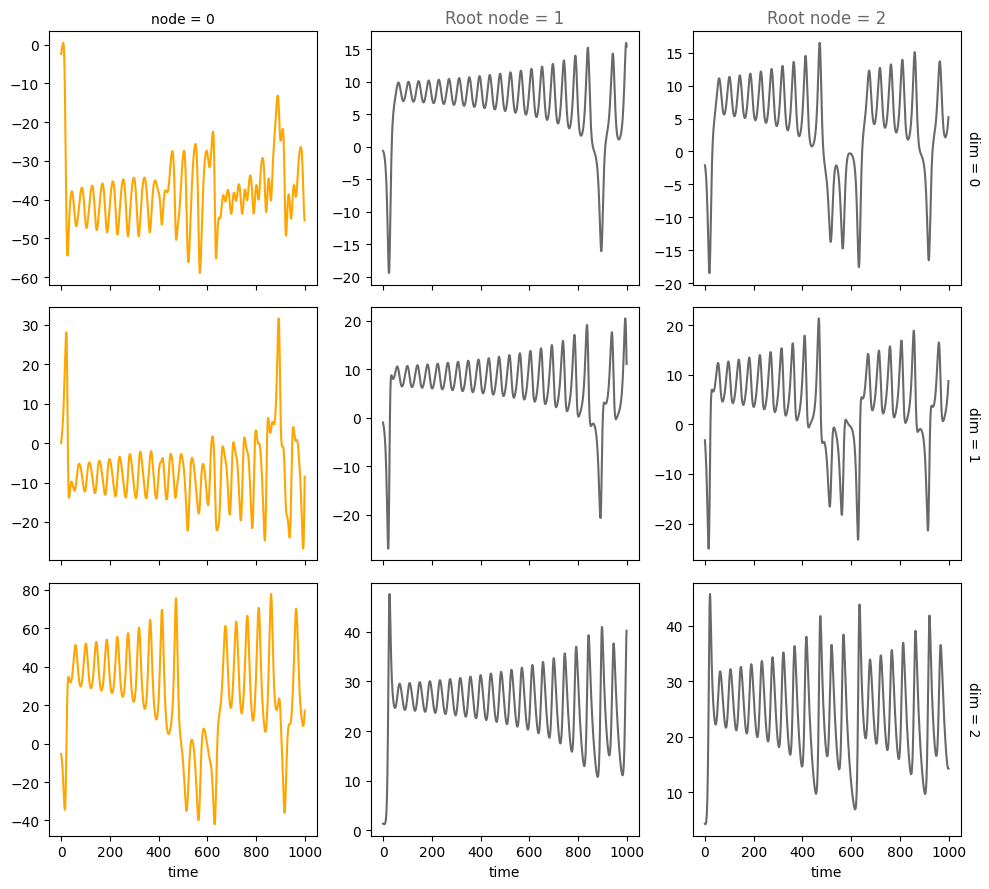

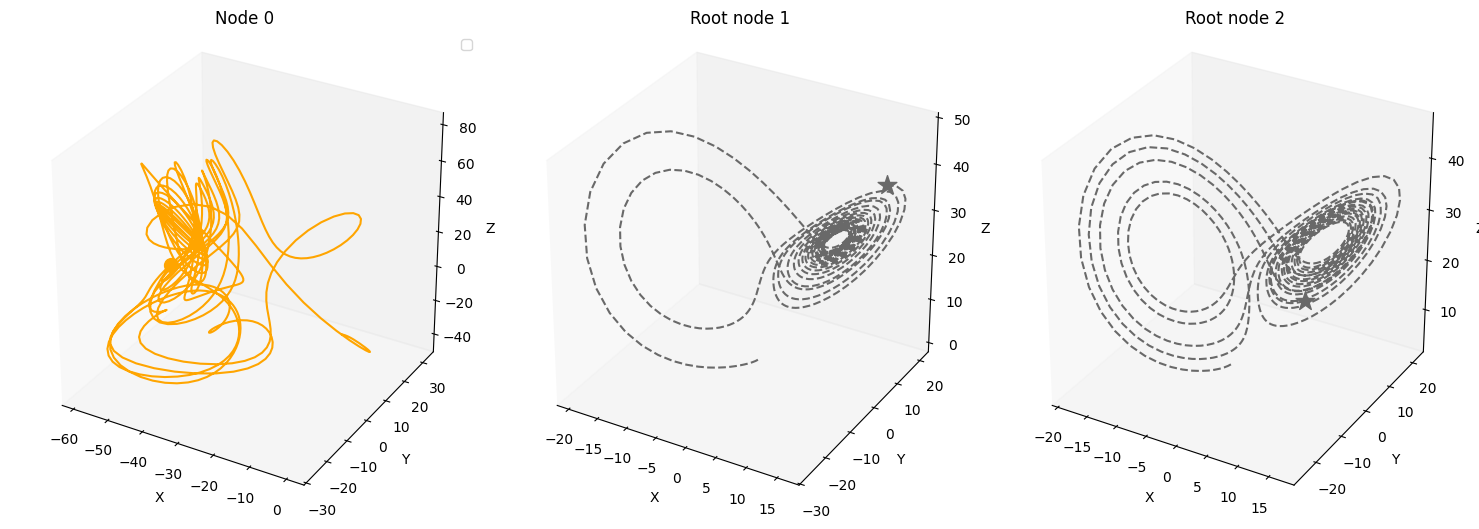

In [3]:
num_nodes = 3
node_dim = 3
num_timesteps = 1000

confounders=False,
system_name='Lorenz'

A = torch.tensor([[0,0,0],
                 [1,0,0],
                 [1,0,0]])

A, W, b, root_nodes, _ = create_scm(num_nodes,
                                    node_dim=node_dim,
                                    confounders=confounders,
                                    adjacency_matrix=A)

data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name) 


plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_trajectories(data, root_nodes, sharey=False)
plot_3d_trajectories(data, root_nodes, line_alpha=1.)


# Confounders 

INFO - Creating SCM with 3 nodes and 3 dimensions each...
INFO - Simulating Lorenz system for 1000 timesteps...


(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Node 1'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 2'}, xlabel='X', ylabel='Y', zlabel='Z'>)

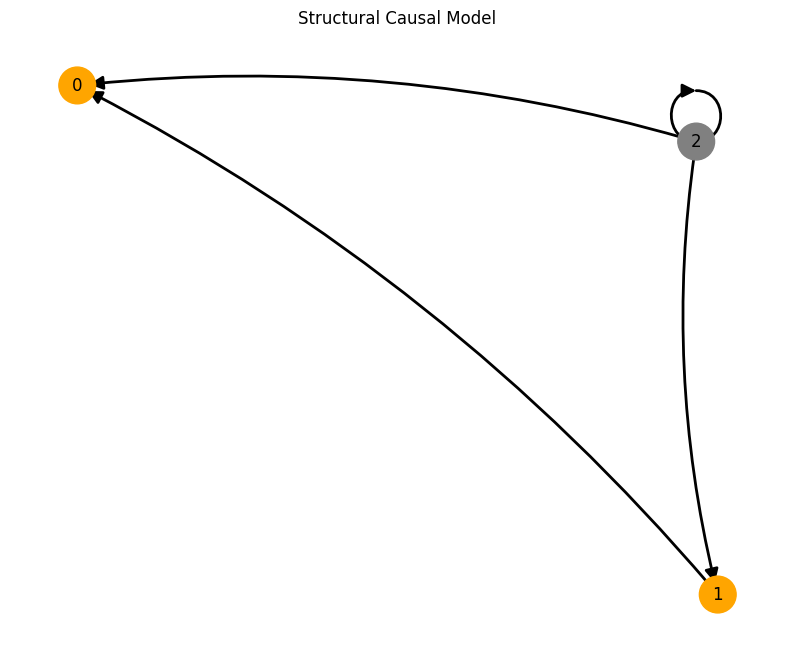

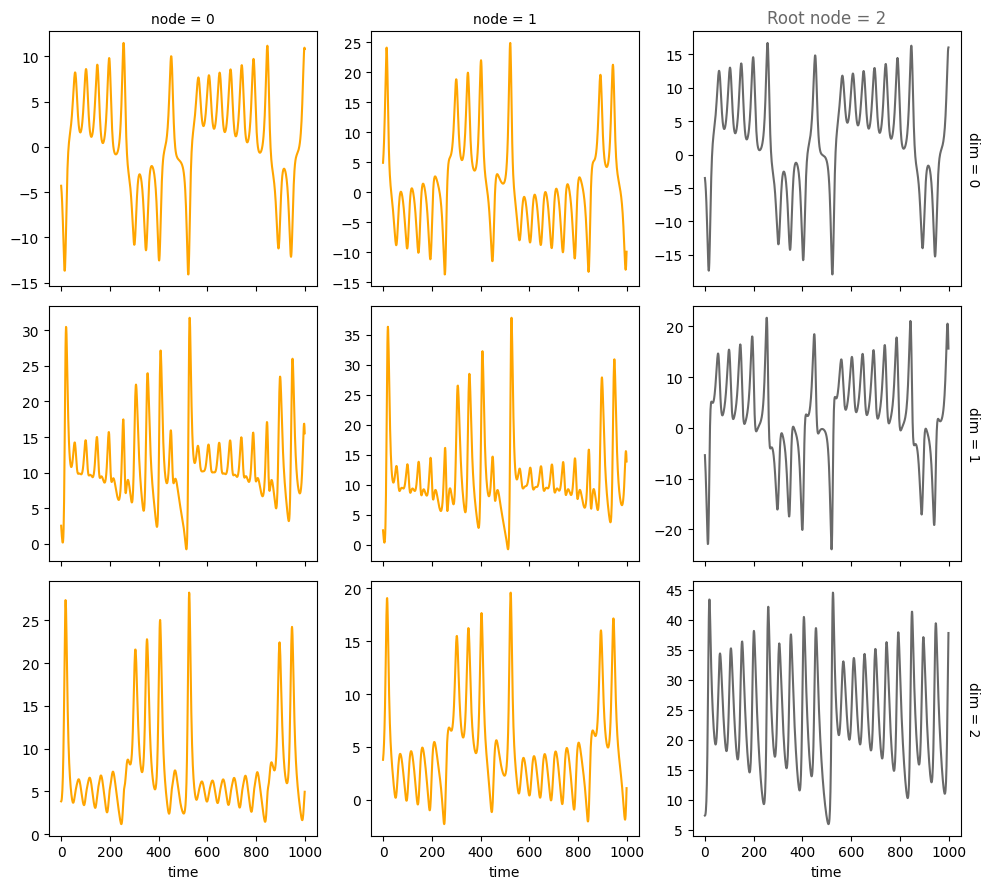

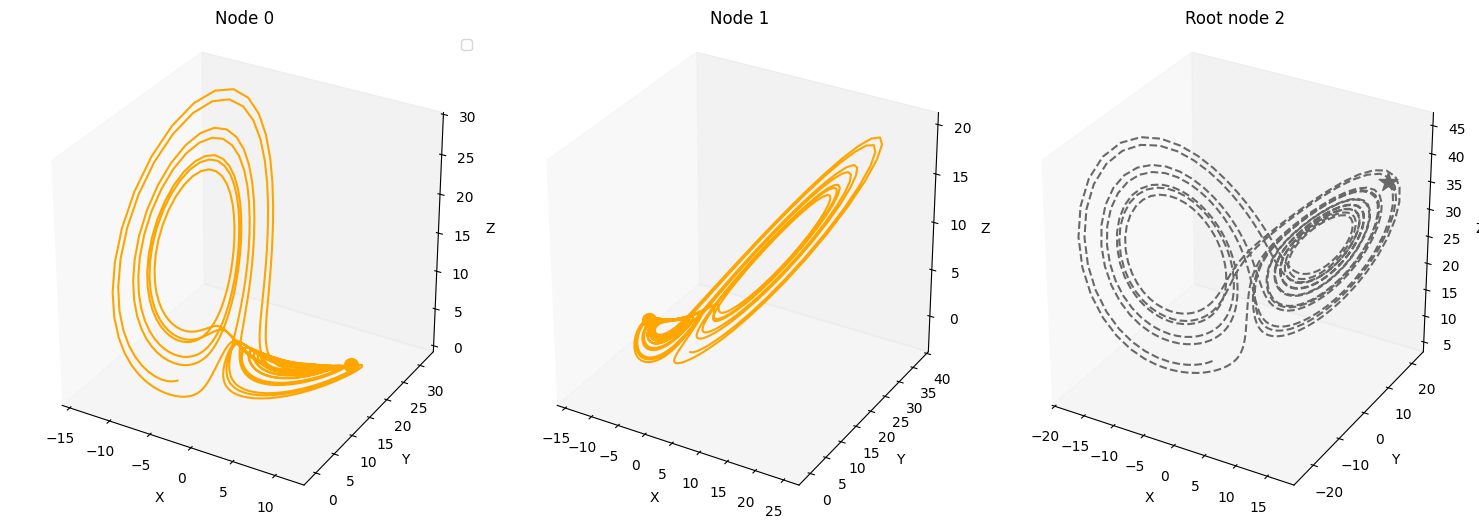

In [4]:
A = torch.tensor([[0,0,0],
                 [1,0,0],
                 [1,1,0]])

A, W, b, root_nodes, _ = create_scm(num_nodes,
                                    node_dim=node_dim,
                                    confounders=confounders,
                                    adjacency_matrix=A)

data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name) 

plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_trajectories(data, root_nodes, sharey=False)
plot_3d_trajectories(data, root_nodes, line_alpha=1.)

# Time-lagged

INFO - Creating SCM with 3 nodes and 3 dimensions each...
INFO - Simulating Lorenz system for 1000 timesteps...


(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Node 1'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 2'}, xlabel='X', ylabel='Y', zlabel='Z'>)

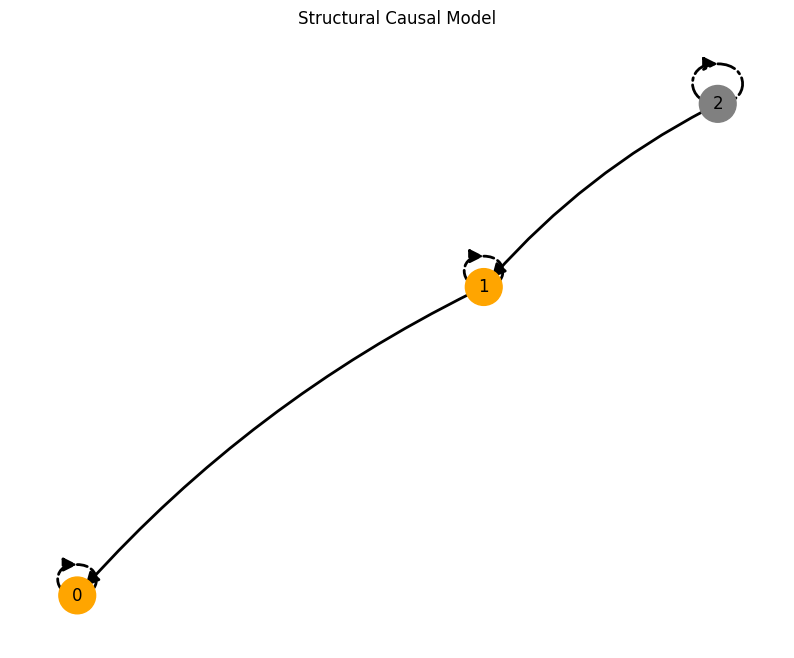

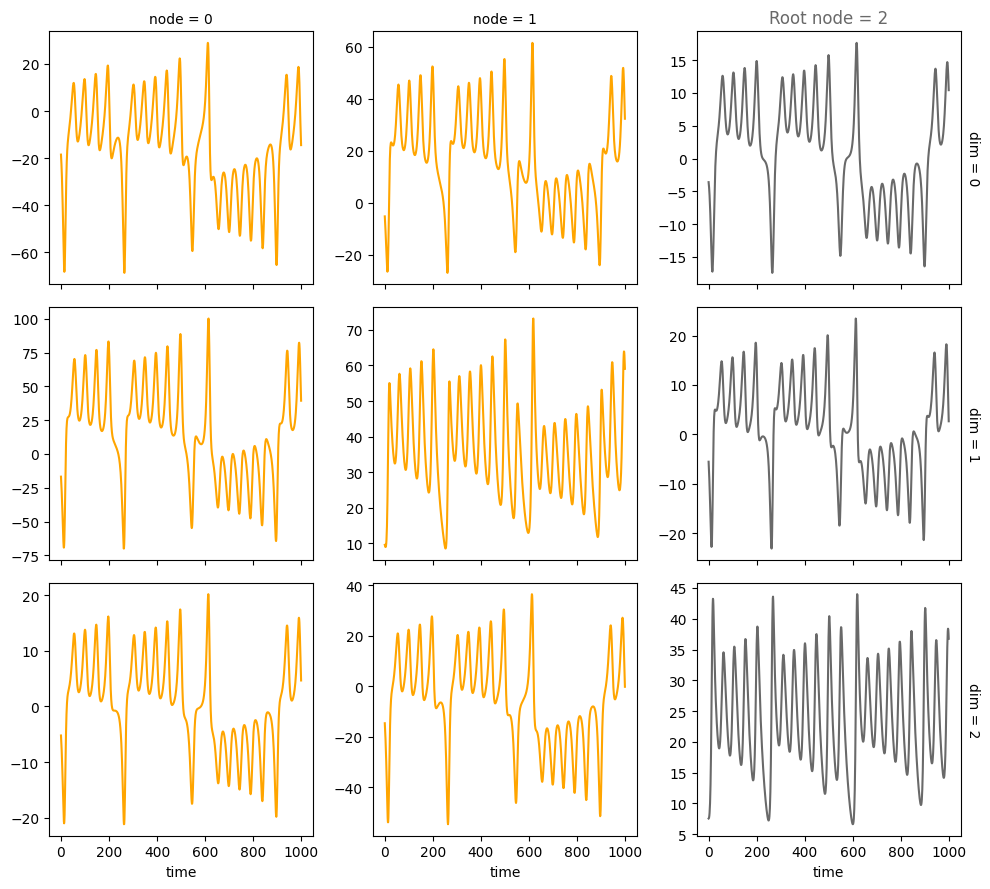

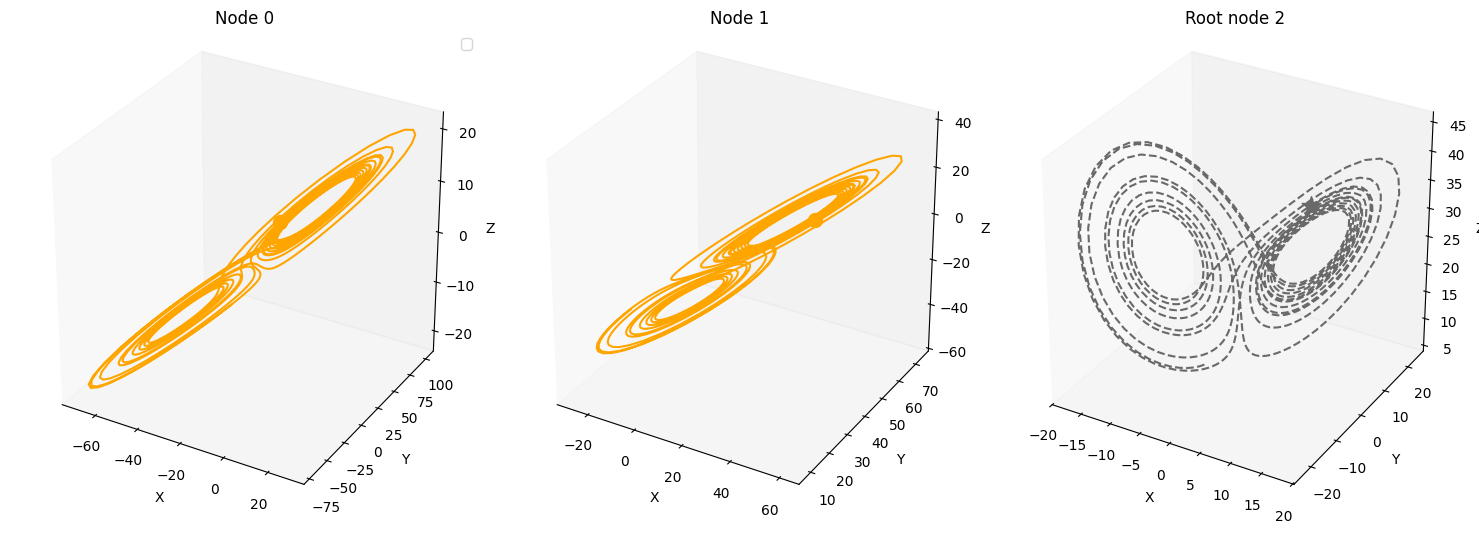

In [5]:
time_lag = 10
time_lag_edge_probability = 0.1

A, W, b, root_nodes, magnitudes = create_scm(
    num_nodes,
    node_dim=node_dim,
    confounders=False,
    graph="scale-free",
    time_lag=time_lag,
    time_lag_edge_probability=time_lag_edge_probability
)

data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name,
                      time_lag=time_lag,) 

plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_trajectories(data, root_nodes, sharey=False)
plot_3d_trajectories(data, root_nodes, line_alpha=1.)

## Stochastic systems

INFO - Creating SCM with 3 nodes and 3 dimensions each...
INFO - Simulating Lorenz system for 1000 timesteps...


(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 1'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 2'}, xlabel='X', ylabel='Y', zlabel='Z'>)

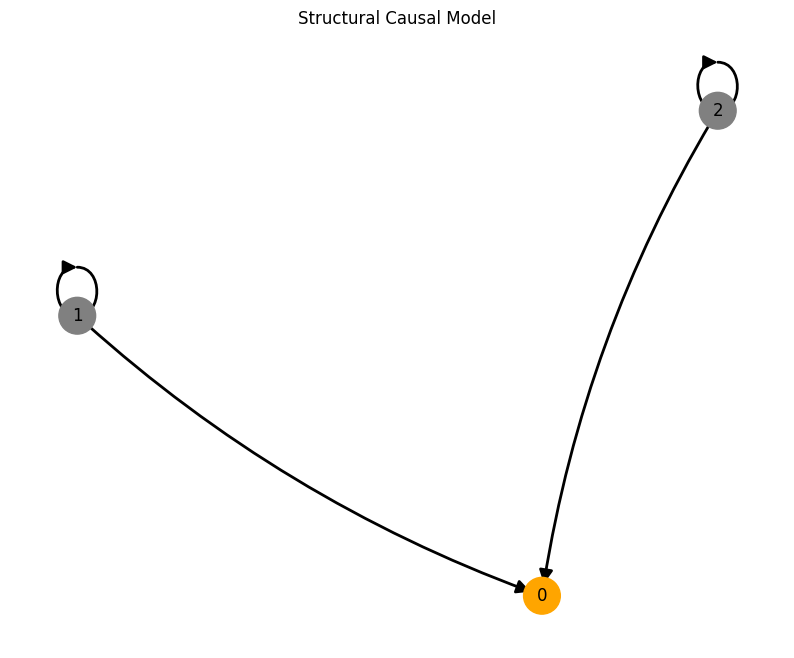

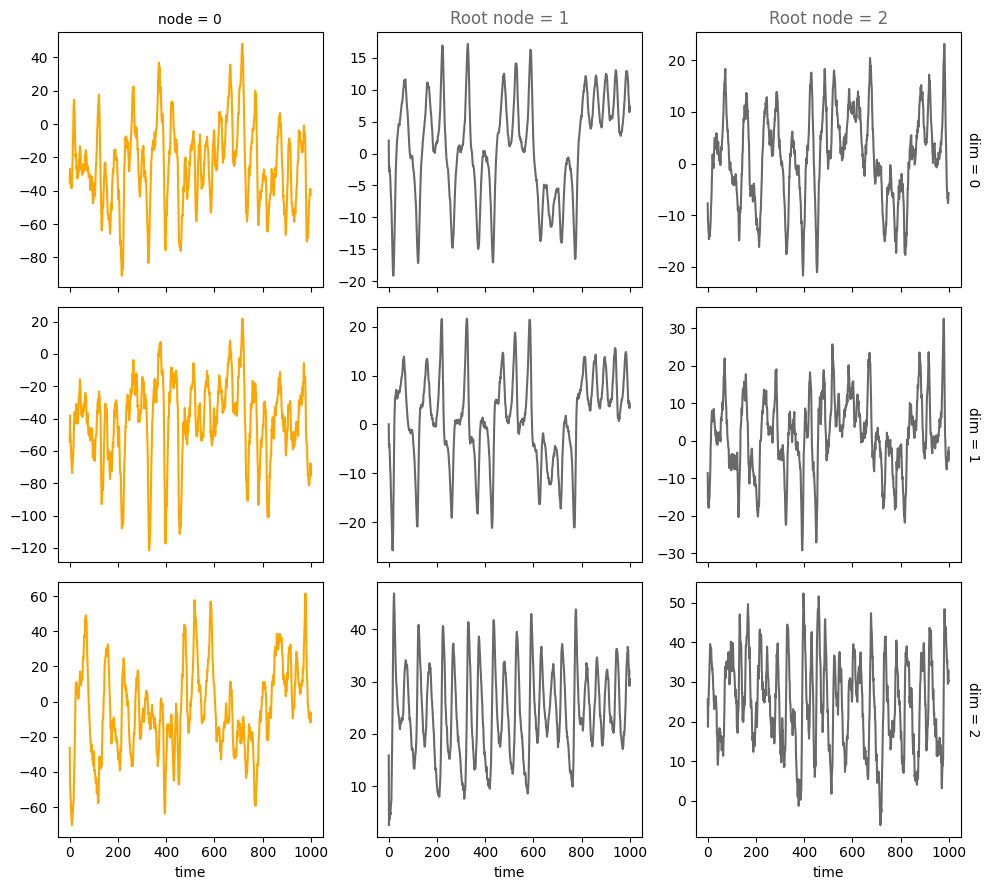

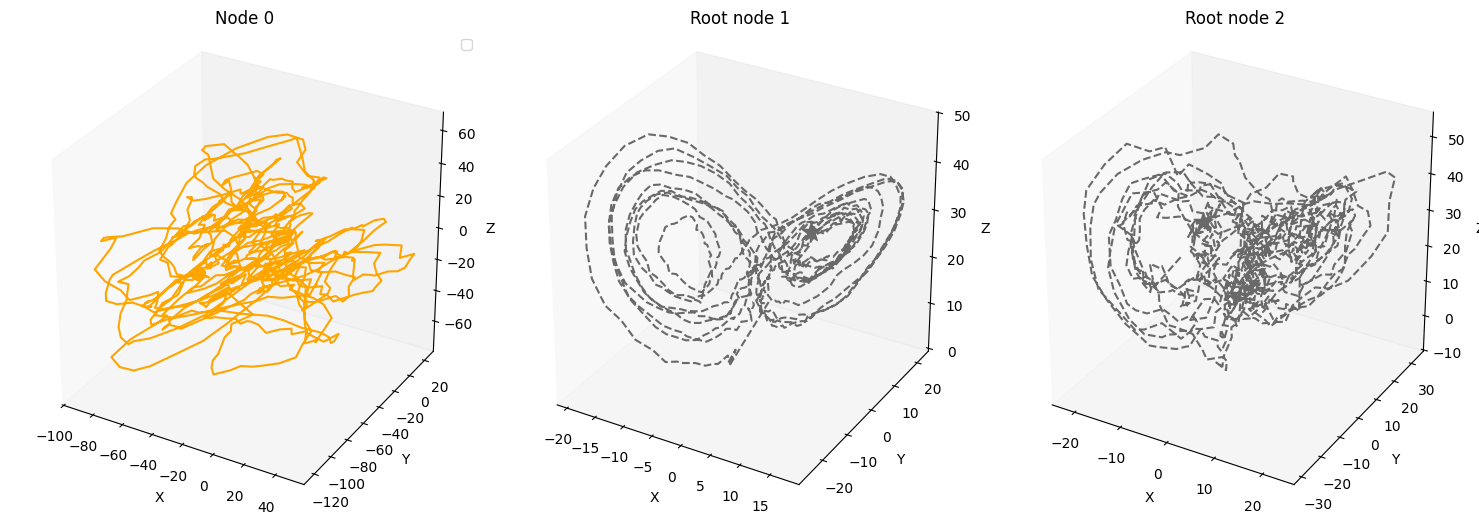

In [6]:
num_nodes = 3
node_dim = 3
num_timesteps = 1000
noise = 1.

confounders=False,
system_name='Lorenz'

A = torch.tensor([[0,0,0],
                 [1,0,0],
                 [1,0,0]])

A, W, b, root_nodes, _ = create_scm(num_nodes,
                                    node_dim=node_dim,
                                    confounders=confounders,
                                    adjacency_matrix=A)

data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name,
                      make_trajectory_kwargs={'noise': noise}) 


plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_trajectories(data, root_nodes, sharey=False)
plot_3d_trajectories(data, root_nodes, line_alpha=1.)

# Periodic driver

INFO - Creating SCM with 3 nodes and 3 dimensions each...
INFO - Simulating Lorenz system for 1000 timesteps...


(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 1'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 2'}, xlabel='X', ylabel='Y', zlabel='Z'>)

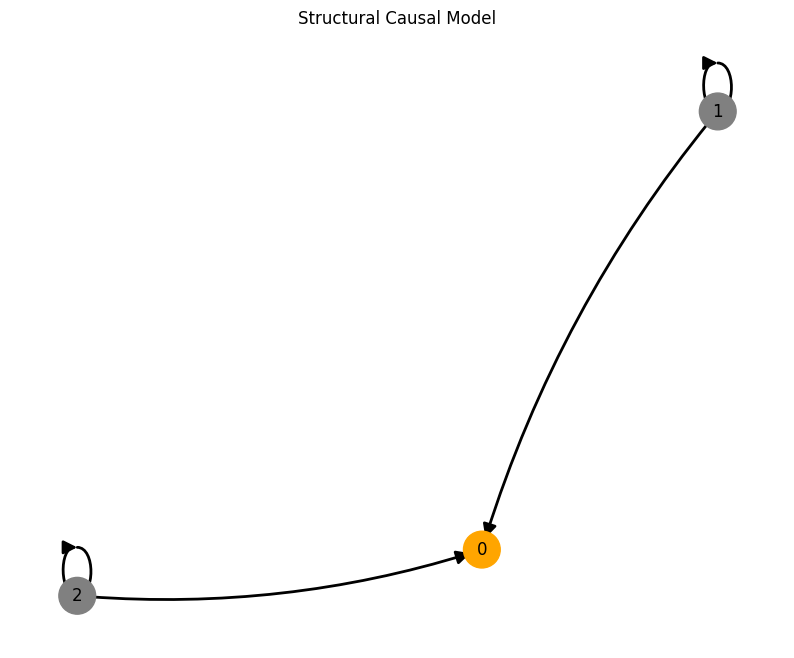

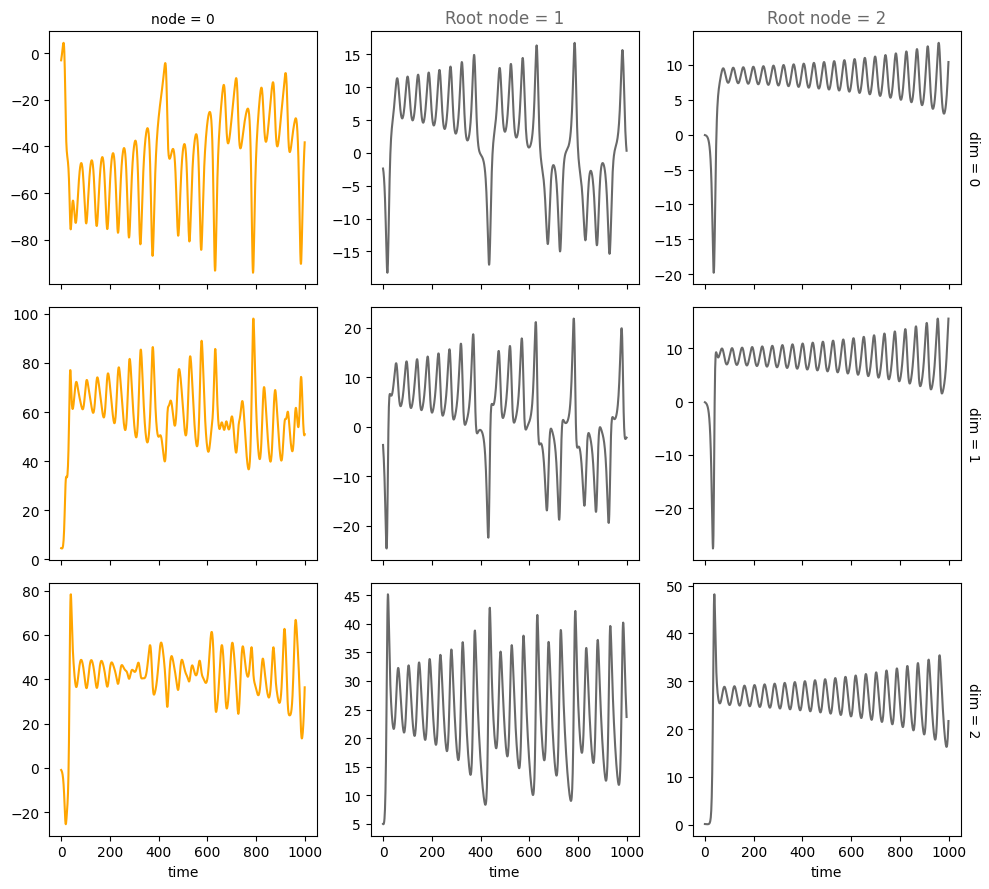

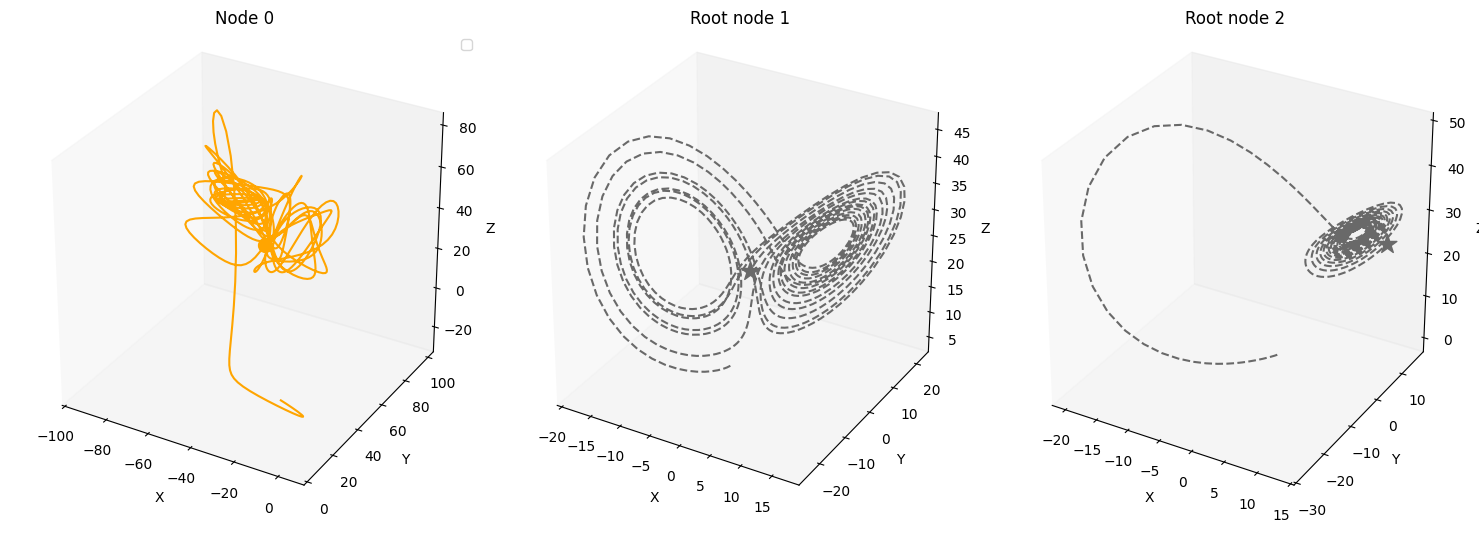

In [7]:
num_nodes = 3
node_dim = 3
num_timesteps = 1000

confounders=False,
system_name='Lorenz'

A = torch.tensor([[0,0,0],
                 [1,0,0],
                 [1,0,0]])

A, W, b, root_nodes, _ = create_scm(num_nodes,
                                    node_dim=node_dim,
                                    confounders=confounders,
                                    adjacency_matrix=A)

data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name,
                      init_ratios=[1,1]) 


plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_trajectories(data, root_nodes, sharey=False)
plot_3d_trajectories(data, root_nodes, line_alpha=1.)

## Internal standardization

INFO - Creating SCM with 3 nodes and 3 dimensions each...
INFO - Simulating Lorenz system for 1000 timesteps...


NameError: name 'plot_3d_trajectories' is not defined

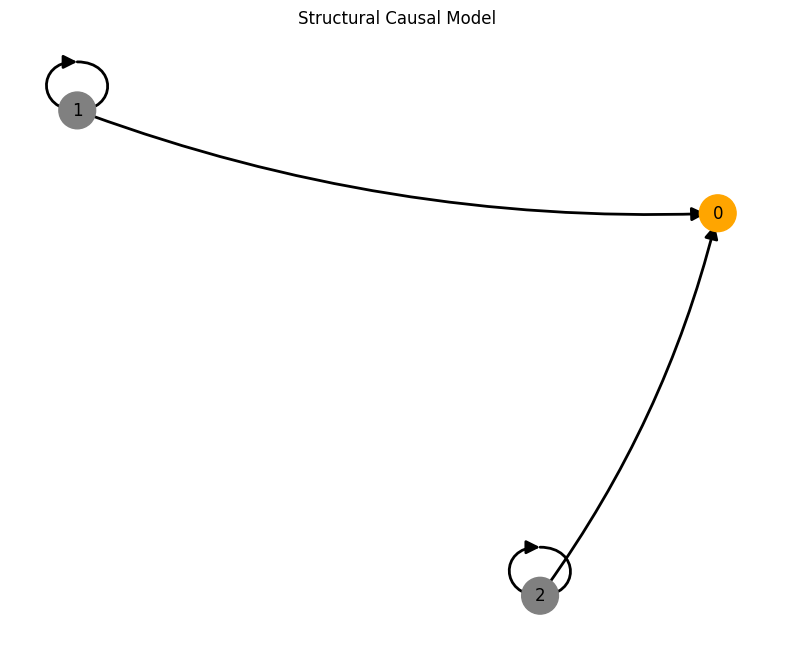

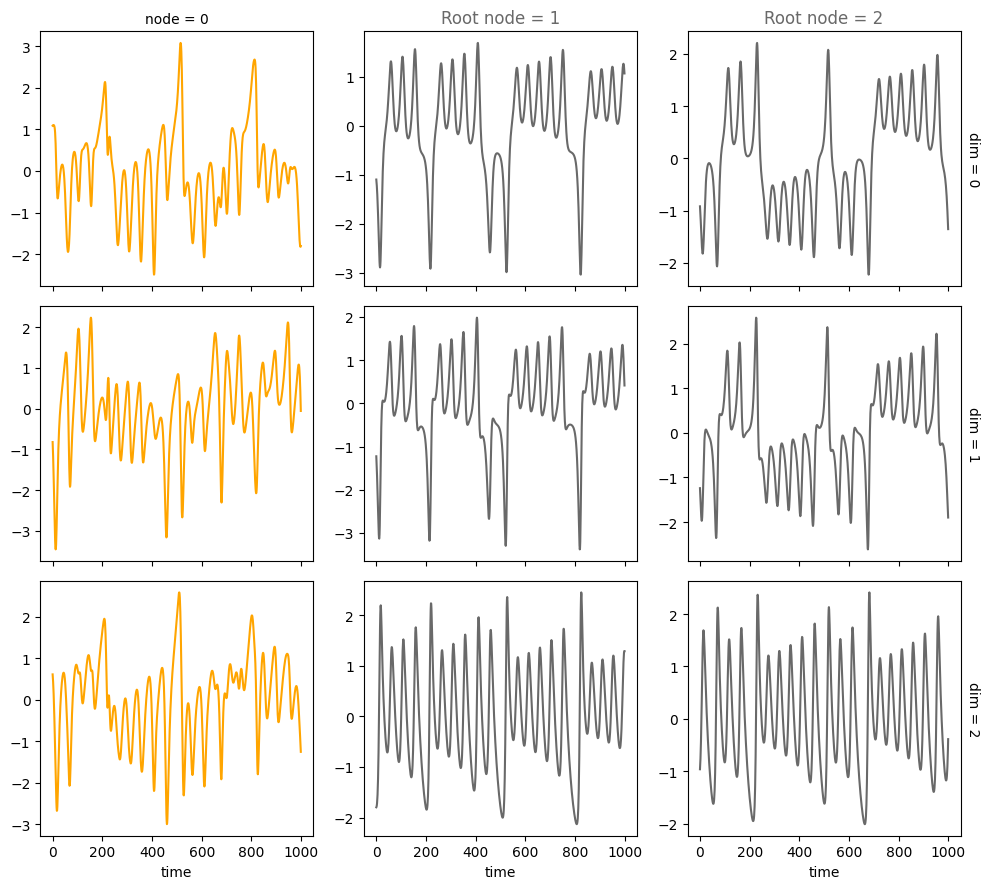

In [9]:
num_nodes = 3
node_dim = 3
num_timesteps = 1000
standardize = True

confounders=False,
system_name='Lorenz'

A = torch.tensor([[0,0,0],
                 [1,0,0],
                 [1,0,0]])

A, W, b, root_nodes, _ = create_scm(num_nodes,
                                    node_dim=node_dim,
                                    confounders=confounders,
                                    adjacency_matrix=A)

data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      standardize=standardize,
                      num_nodes=num_nodes,
                      system_name=system_name) 


plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_trajectories(data, root_nodes, sharey=False)
plot_3d_trajectories(data, root_nodes, line_alpha=0.5)
